12.43796359505817
3.3063675591042196
2.717652138057456
1.3293866993015984
0.7610651694368145
2.0555742431991826
1.639508200225405
0.950264773821321
0.8115389729054671
0.45772453570840166
0.07543844365787364
0.0
Converged!


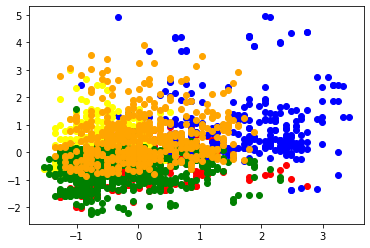

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import enum

In [4]:
# enum: type of distance
class DistanceType(enum.Enum):
    Euclidean = 0,
    Pearson = 1

In [5]:
# reading and removing the ID column
data_raw = pd.read_csv("Customer data.csv").iloc[:, 1:]

# normalized data
data = (data_raw-data_raw.mean())/data_raw.std()

In [6]:
# calculate euclidean distance between two points
def GUC_Euclidean(centroid, user):
    return np.sum((centroid - user)**2)


In [7]:
# return distance matrix (K centroids by No. of users)
def GUC_Distance(centroids, data, dist_type=DistanceType.Euclidean):
    # initializing matrix
    mat = np.zeros([len(data), len(centroids)])
    # looping
    for c in range(len(centroids)):
        for i in range(len(data)):
            centroid = centroids[c]
            user = data.iloc[i]
            mat[i, c] = GUC_Euclidean(centroid, user)
    return mat

In [8]:
# update the centroids
def GUC_K_mean_update(centroids, data, dist_type=DistanceType.Euclidean):
    # distance matrix and 
    dist_mat = GUC_Distance(centroids, data)
    i_min = np.argmin(dist_mat, axis=1)
    # initializing count and mean
    c_count, c_mean = [0]*len(centroids), [None]*len(centroids)
    for j in range(len(centroids)):
        c_mean[j] = data.iloc[0].copy()*0
    # looping
    for i_u in range(len(i_min)):
        user, c = data.iloc[i_u], i_min[i_u]
        c_count[c] += 1
        c_mean[c] += user
    for c in range(len(c_count)):
        c_mean[c] /= c_count[c]
    return c_mean

In [9]:
def GUC_K_mean(data, K, dist_type=DistanceType.Euclidean):
    # generate K random centroids
    centroids = [None]*K
    for c in range(len(centroids)):
        centroids[c] = data.sample(n=1).reset_index(drop=True).iloc[0]
    # updating
    epsillon = 1
    while epsillon > 0.001:
        _centroids = GUC_K_mean_update(centroids, data)
        # new epsillon
        epsillon = 0
        for c, _centroid in enumerate(_centroids):
            epsillon += np.sum(abs(_centroid - centroids[c]))
        # updating centroids
        centroids = _centroids
        print(epsillon)
    # converged
    print("Converged!")
    return centroids


In [10]:
# separates users into dataframes per centroids
def GUC_Get_Users(centroids, data):
    dist_mat = GUC_Distance(centroids, data)
    i_min = np.argmin(dist_mat, axis=1)
    # new lists
    separated = [None]*len(centroids)
    for i in range(len(centroids)):
        separated[i] = []
    # separating...
    for j in range(len(i_min)):
        c = i_min[j]
        separated[c].append(j)
    # returned dataframes
    for i in range(len(centroids)):
        separated[i] = data.iloc[separated[i]]
    return separated


18.552967498013913
5.038661236721083
2.6430192627473836
1.377976500470031
1.036895829403866
0.6145886727324097
0.33828699221838987
0.21788827832313284
0.38430784680842445
0.39784049203303085
0.3451062028446464
0.32436009541384886
0.29600146576289127
0.22329246343166256
0.34097365854014333
0.3405048720072803
0.3531585913985252
0.4528198969851262
0.5474914785453178
0.36553482367565154
0.2768654561685113
0.13606062245251282
0.16272442980018714
0.10564143813720694
0.11654103586867168
0.2405582265360497
0.2613760103382879
0.27763803107193774
0.28357677181060337
0.45371449044704376
0.8237783272397161
0.9416622282137572
0.4628984204559194
0.8941076757384352
0.7322995876102978
1.267164158607037
0.6897516402328407
0.37181232706505596
0.11261868906140017
0.08775892651054254
0.10521532582920379
0.11121280960951441
0.070157908214251
0.07119577046310396
0.07567975679560053
0.03276286218451416
0.0
Converged!


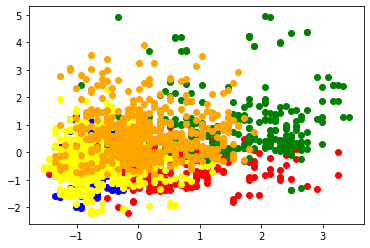

In [11]:
# centroids, and plotting
centroids = GUC_K_mean(data, 5)
separated = GUC_Get_Users(centroids, data)
colors = ['Red', 'Blue', 'Yellow', 'Green', 'Orange']
for i in range(len(separated)):
    plt.scatter(separated[i]['Age'], separated[i]['Income'], color=colors[i])
plt.show()